🔹 First 5 Rows:
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   Uni

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


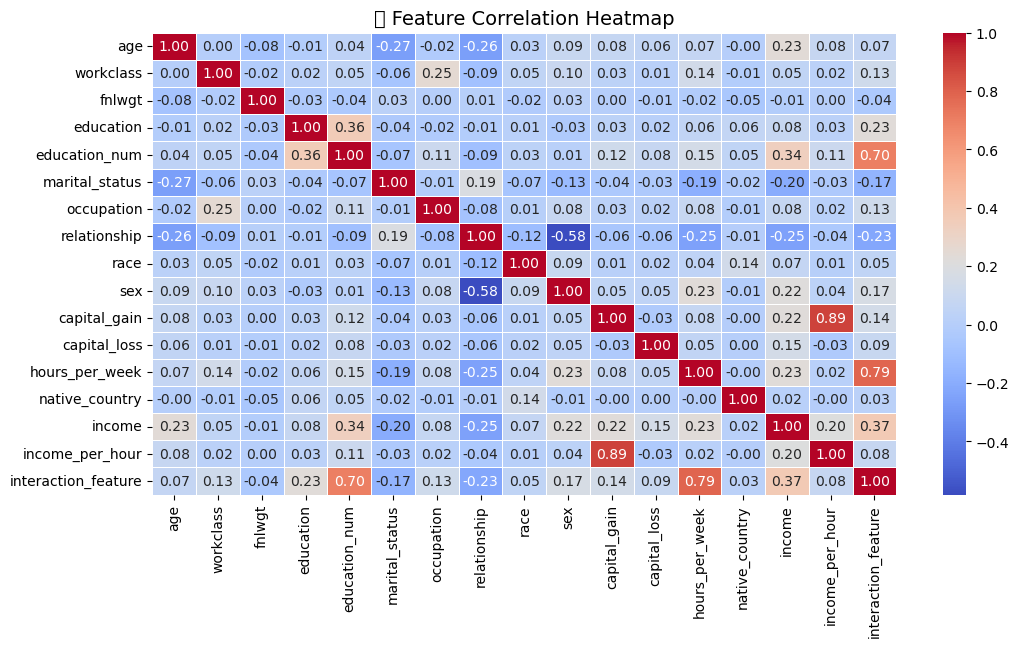

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


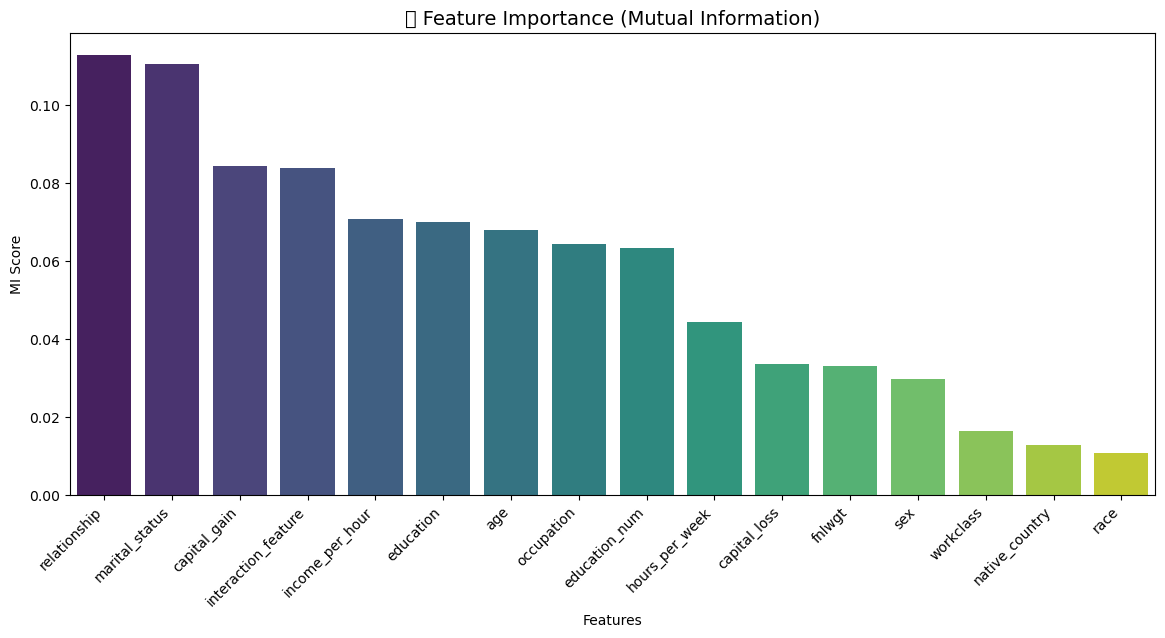


🔹 Selected Features: ['age', 'education_num', 'marital_status', 'relationship', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_per_hour', 'interaction_feature']

🔹 Final Processed Dataset Sample:
    age  education_num  marital_status  relationship  sex  capital_gain  \
0   39             13               4             1    1          2174   
1   50             13               2             0    1             0   
2   38              9               0             1    1             0   
3   53              7               2             0    1             0   
4   28             13               2             5    0             0   

   capital_loss  hours_per_week  income_per_hour  interaction_feature  
0             0              40         53.02439                  520  
1             0              13          0.00000                  169  
2             0              40          0.00000                  360  
3             0              40          0.00000   

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

# 📌 Load Dataset
file_path = r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\adult_with_headers.csv"
df = pd.read_csv(file_path)

# 📌 Quick Overview
print("🔹 First 5 Rows:\n", df.head(), "\n")
print("🔹 Dataset Info:\n", df.info(), "\n")
print("🔹 Summary Statistics:\n", df.describe(), "\n")

# 📌 Handle Missing Values
df.dropna(inplace=True)  # Drop rows with missing values

# 📌 Convert Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# 📌 Feature Engineering (New Features)
df["income_per_hour"] = df["capital_gain"] / (df["hours_per_week"] + 1)  # Avoid division by zero
df["interaction_feature"] = df["education_num"] * df["hours_per_week"]

# 📌 Normalize Data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 📌 Pearson Correlation Matrix (Feature Relationships)
plt.figure(figsize=(12, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔹 Feature Correlation Heatmap", fontsize=14)
plt.show()

# 📌 Feature Importance using Mutual Information
X = df.drop(columns=["income"])  # Target column: "income"
y = df["income"]

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# 📌 Plot Mutual Information Scores
plt.figure(figsize=(14, 6))
sns.barplot(x=mi_results.index, y=mi_results, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("🔹 Feature Importance (Mutual Information)", fontsize=14)
plt.xlabel("Features")
plt.ylabel("MI Score")
plt.show()

# 📌 Feature Selection using SelectKBest
top_k = 10  # Select top 10 features
selector = SelectKBest(score_func=f_classif, k=top_k)
X_selected = selector.fit_transform(X, y)

# 📌 Show Selected Features
selected_features = X.columns[selector.get_support()]
print("\n🔹 Selected Features:", selected_features.tolist())

# 📌 Final DataFrame with Selected Features
df_final = df[selected_features]
print("\n🔹 Final Processed Dataset Sample:\n", df_final.head())

# 📌 Save Processed Data
df_final.to_csv("processed_data.csv", index=False)
print("\n✅ Processed data saved as 'processed_data.csv'")
